<a href="https://colab.research.google.com/github/murillocjr/convolutionalNN/blob/master/visualizingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Convolutional Filters Visualization</h1>


https://www.oreilly.com/ideas/visualizing-convolutional-neural-networks

https://www.datasciencecentral.com/profiles/blogs/dogs-vs-cats-image-classification-with-deep-learning-using

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

https://www.saama.com/blog/different-kinds-convolutional-filters/

In [0]:
import imageio as imageio
import tensorflow as tf

from skimage.transform import  resize
from scipy.misc import imsave
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


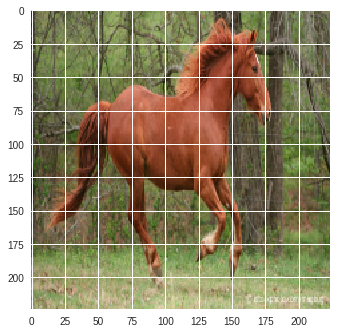

(224, 224, 3)


In [0]:
#file = "http://gdurl.com/CAMx" #zebra
file = "http://gdurl.com/iE0S" #horse

im = imageio.imread(file)


image = resize(im, [224,224])
plt.imshow(image)
plt.show()
print(image.shape)

In [0]:
filters = np.zeros([7,7,1,6])


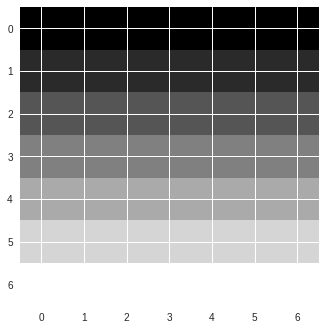

In [0]:

filters[0,:,0,0] = -3
filters[1,:,0,0] = -2
filters[2,:,0,0] = -1
filters[3,:,0,0] = 0
filters[4,:,0,0] = 1
filters[5,:,0,0] = 2
filters[6,:,0,0] = 3

plt.imshow(filters[:,:,:,0].reshape(7,7), cmap='gray')
plt.show()

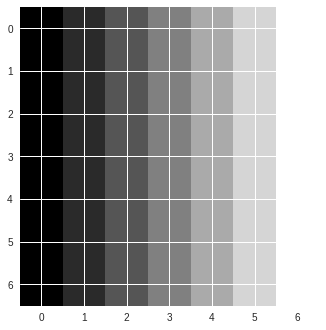

In [0]:
filters[:,0,0,1] = -3
filters[:,1,0,1] = -2
filters[:,2,0,1] = -1
filters[:,3,0,1] = 0
filters[:,4,0,1] = 1
filters[:,5,0,1] = 2
filters[:,6,0,1] = 3
plt.imshow(filters[:,:,:,1].reshape(7,7), cmap='gray')
plt.show()

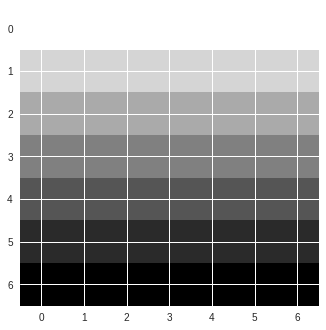

In [0]:
filters[0,:,0,2] = 3
filters[1,:,0,2] = 2
filters[2,:,0,2] = 1
filters[3,:,0,2] = 0
filters[4,:,0,2] = -1
filters[5,:,0,2] = -2
filters[6,:,0,2] = -3

plt.imshow(filters[:,:,:,2].reshape(7,7), cmap='gray')
plt.show()

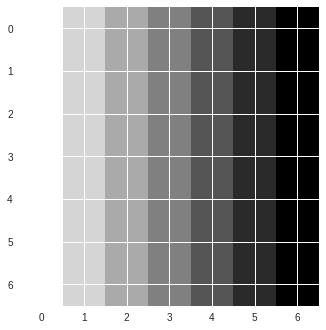

In [0]:
filters[:,0,0,3] = 3
filters[:,1,0,3] = 2
filters[:,2,0,3] = 1
filters[:,3,0,3] = 0
filters[:,4,0,3] = -1
filters[:,5,0,3] = -2
filters[:,6,0,3] = -3

plt.imshow(filters[:,:,:,3].reshape(7,7), cmap='gray')
plt.show()




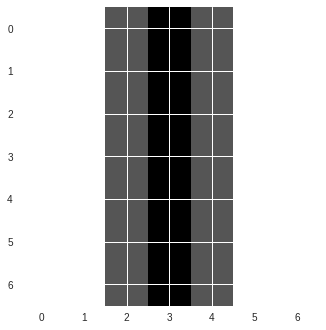

In [0]:
filters[:,0,0,4] = 2
filters[:,1,0,4] = 2
filters[:,2,0,4] = -2
filters[:,3,0,4] = -4
filters[:,4,0,4] = -2
filters[:,5,0,4] = 2
filters[:,6,0,4] = 2

plt.imshow(filters[:,:,:,4].reshape(7,7), cmap='gray')
plt.show()

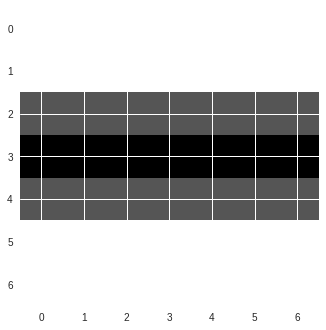

In [0]:
filters[0,:,0,5] = 2
filters[1,:,0,5] = 2
filters[2,:,0,5] = -2
filters[3,:,0,5] = -4
filters[4,:,0,5] = -2
filters[5,:,0,5] = 2
filters[6,:,0,5] = 2

plt.imshow(filters[:,:,:,5].reshape(7,7), cmap='gray')
plt.show()

In [0]:
print(filters.shape)

(7, 7, 1, 6)


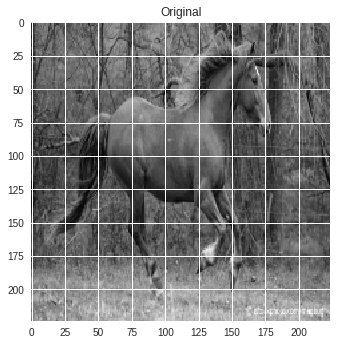

(224, 224)


In [0]:
gray = np.mean(image,-1)

X = tf.placeholder(tf.float32, shape=(None, 224, 224, 1))

conv = tf.nn.conv2d(X, filters, [1,1,1,1], padding="SAME")

filterSession = tf.Session()
filterSession.run(tf.global_variables_initializer())

filteredImage = filterSession.run(conv, feed_dict={X: gray.reshape(1,224,224,1)})
tf.reset_default_graph()

plt.imshow(gray, cmap='gray')
plt.title('Original')
plt.show()
print(gray.shape)


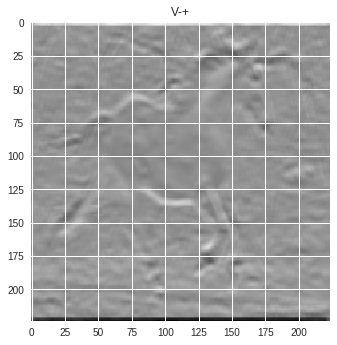

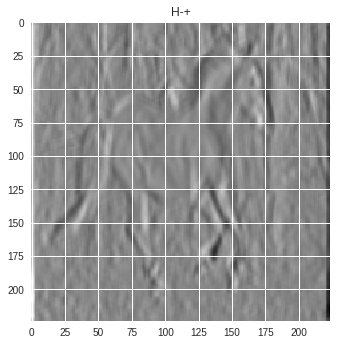

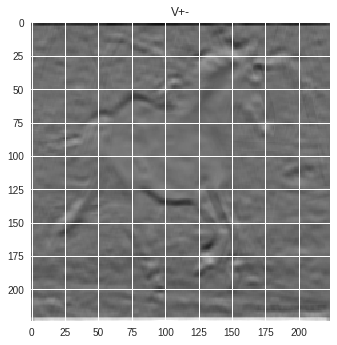

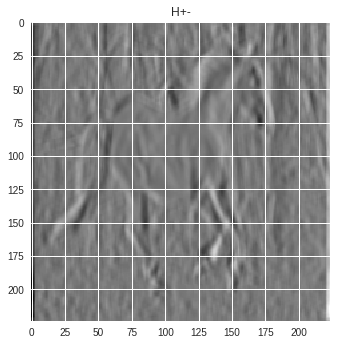

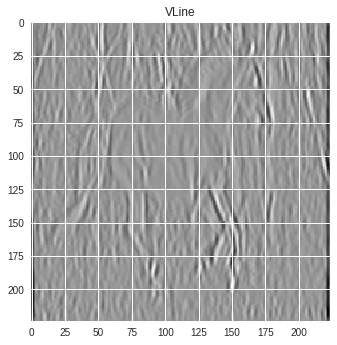

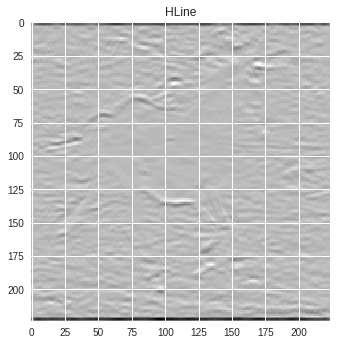

In [0]:
labels = ['V-+', 'H-+', 'V+-', 'H+-', 'VLine', 'HLine']

for i in range(6):
    plt.title(labels[i])
    plt.imshow(filteredImage[:,:,:,i].reshape(224,224),cmap = 'gray')
    plt.show()

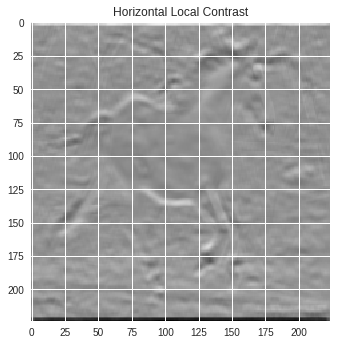

(224, 224)


In [0]:
image_horizontal = filteredImage[:,:,:,0].reshape(224,224)

plt.title("Horizontal Local Contrast")
plt.imshow(image_horizontal,cmap = 'gray')
plt.show()

print(image_horizontal.shape)

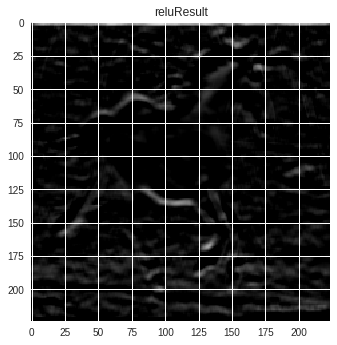

(224, 224)
[[ 5.703539   7.9455028 10.451065  ... 14.842257  12.695549  10.387268 ]
 [ 5.2159715  7.0628743  9.101372  ... 11.34285    9.852394   8.058895 ]
 [ 3.6411111  4.9298697  6.080771  ...  5.612561   4.8188043  3.8738704]
 ...
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]]


In [0]:
X = tf.placeholder(tf.float32, shape=(224, 224))

relu_1 = tf.nn.relu(X)

reluSession = tf.Session()
reluSession.run(tf.global_variables_initializer())

reluResult = reluSession.run(relu_1, feed_dict={X: image_horizontal})
tf.reset_default_graph()

plt.title("reluResult")
plt.imshow(reluResult,cmap = 'gray')
plt.show()
print(reluResult.shape)
print(reluResult)

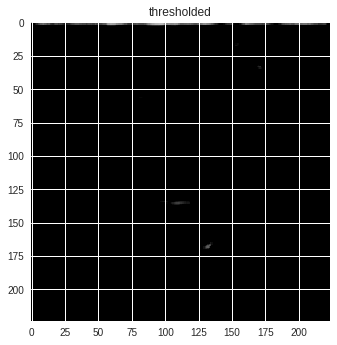

(224, 224)
[[10.       10.       10.451065 ... 14.842257 12.695549 10.387268]
 [10.       10.       10.       ... 11.34285  10.       10.      ]
 [10.       10.       10.       ... 10.       10.       10.      ]
 ...
 [10.       10.       10.       ... 10.       10.       10.      ]
 [10.       10.       10.       ... 10.       10.       10.      ]
 [10.       10.       10.       ... 10.       10.       10.      ]]


In [0]:
X = tf.placeholder(tf.float32, shape=(224, 224))

threshold_1 = tf.clip_by_value(
    X,
    10,
    100
)
thSession = tf.Session()
thSession.run(tf.global_variables_initializer())

thresholded = thSession.run(threshold_1, feed_dict={X: reluResult})
tf.reset_default_graph()

plt.title("thresholded")
plt.imshow(thresholded,cmap = 'gray')
plt.show()

print(thresholded.shape)
print(thresholded)




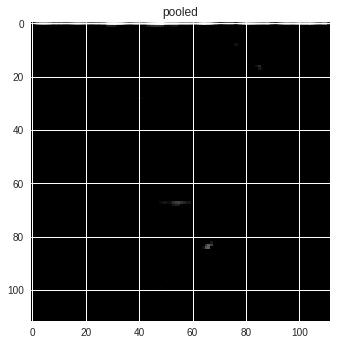

In [0]:
X = tf.placeholder(tf.float32, shape=(None, 224, 224, 1))

pool1_1 = tf.nn.max_pool(X,
                             ksize=[1, 2, 2, 1],
                             strides=[1, 2, 2, 1],
                             padding='SAME')

test = tf.Session()
test.run(tf.global_variables_initializer())

pooledImage = test.run(pool1_1, feed_dict={X: thresholded.reshape(1,224,224,1)})
tf.reset_default_graph()

#print(pooledImage)
plt.title("pooled")
plt.imshow(pooledImage[:,:,:,0].reshape(112,112),cmap = 'gray')
plt.show()